In [1]:
import sys
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
from numpy import *
from pylab import *
import cmocean as cm
%matplotlib inline

In [2]:
outfile='/g/data/v45/jm5970/trackeddy_out/'

In [3]:
read_dictionary1 = np.load(outfile+'306_pos.npy')
dict1=read_dictionary1.item()
read_dictionary2 = np.load(outfile+'307_pos.npy')
dict2=read_dictionary2.item()

read_dictionary3 = np.load(outfile+'308_pos.npy')
dict3=read_dictionary3.item()
read_dictionary4 = np.load(outfile+'309_pos.npy')
dict4=read_dictionary4.item()

In [4]:
def joindict(dict1,dict2):
    checklist=[]
    checklist1=[]
    checklist2=[]
    for key, value in list(dict1.items()):
        check=False
        #print(type(value['time']))
        if type(value['time'])==int or len(value['time'])==1:
            eddyxt0=value['position'][0]
            eddyyt0=value['position'][1]
            if value['time']>=89-5:
                check=True
                timee=value['time']
        else:
            #print(value['time'])
            #print(value['position'])
            eddyxt0=value['position'][-1][0]
            eddyyt0=value['position'][-1][1]
            if value['time'][-1]>=89-5:
                check=True
                timee=value['time'][-1]
        if check==True:
            if type(value['time'])==int:
                lonmi0=value['contour'][0][0].min()
                lonma0=value['contour'][0][0].max()
                latmi0=value['contour'][0][1].min()
                latma0=value['contour'][0][1].max()
            else:
                lonmi0=value['contour'][-1][0].min()
                lonma0=value['contour'][-1][0].max()
                latmi0=value['contour'][-1][1].min()
                latma0=value['contour'][-1][1].max()
                
            for key1, value1 in list(dict2.items()):
                if type(value1['time'])==int:
                    ts=value1['time']
                    eddyxt1=value1['position'][0]
                    eddyyt1=value1['position'][1]
                else:
                    ts=int(value1['time'][0])
                    eddyxt1=value1['position'][0][0]
                    eddyyt1=value1['position'][0][1]
                if ts<=5:
                    if (eddyxt1<=lonma0 and eddyxt1>=lonmi0 and eddyyt1<=latma0 and eddyyt1>=latmi0) and\
                        (eddyxt0<=lonma0 and eddyxt0>=lonmi0 and eddyyt0<=latma0 and eddyyt0>=latmi0):
                        dict1[key]={'neddy':int(value['neddy']),'time':np.vstack((value['time'],value1['time']+timee)),\
                                            'position':np.vstack((value['position'],value1['position'])),\
                                            'area':np.vstack((value['area'],value1['area'])),\
                                            'angle':np.vstack((value['angle'],value1['angle'])),\
                                            'ellipse':value['ellipse']+value1['ellipse'],\
                                            'contour':value['contour']+value1['contour'],\
                                            'position_eddy':np.vstack((value['position_eddy'],value1['position_eddy'])),\
                                            'level':np.vstack((value['level'],value1['level'])),\
                                            'minoraxis':np.vstack((value['minoraxis'],value1['minoraxis'])),\
                                            'majoraxis':np.vstack((value['majoraxis'],value1['majoraxis']))}
                        checklist.append(int(value['neddy']))
                        checklist1.append(int(value1['neddy']))
                        checklist2.append(key)
    neweddycount=1
    for key1, value1 in list(dict2.items()):
        #print(value1['neddy'],checklist1)
        #print((value1['neddy']!=checklist1))
        #print(value1['neddy'],checklist1)
        if type(value1['neddy']!=checklist1) is np.ndarray:
            check=(value1['neddy']!=checklist1).all()
        else:
            check=(value1['neddy']!=checklist1)
        if check:
            #print('eddyn_'+str(len(dict1)+neweddycount))
            dict1['eddyn_'+str(len(dict1)+neweddycount)]={'neddy':len(dict1)+neweddycount,\
                                            'time':value1['time']+timee,\
                                            'position':value1['position'],\
                                            'area':value1['area'],\
                                            'angle':value1['angle'],\
                                            'ellipse':value1['ellipse'],\
                                            'contour':value1['contour'],\
                                            'position_eddy':value1['position_eddy'],\
                                            'level':value1['level'],\
                                            'minoraxis':value1['minoraxis'],\
                                            'majoraxis':value1['majoraxis']}
            neweddycount=neweddycount+1
    #print(checklist1)
    #print(checklist2)
    #for key, value in list((dict1.items()!=checklist).all()):
    #    print(key)
    #print('check',len(checklist))
    #print('check1',len(checklist1))
    #print(neweddycount)
    return dict1

In [5]:
print(len(dict1))
print(len(dict2))
print(len(dict3))
print(len(dict4))

4432
4509
3502
3220


In [6]:
dictjoin=joindict(dict1,dict2)

dictjoin1=joindict(dict3,dict4)

In [7]:
print(len(dictjoin))
print(len(dictjoin1))

8684
6512


In [8]:
yearjoin=joindict(dictjoin,dictjoin1)

In [9]:
for key1, value1 in list(dictjoin.items()):
    print(key1)
    print(value1['time'])

eddyn_0
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
eddyn_1
0
eddyn_2
[[0]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
eddyn_3
[[0]
 [3]
 [4]]
eddyn_4
[[0]
 [1]
 [2]]
eddyn_5
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]
eddyn_6
[[0]
 [1]
 [3]
 [5]
 [6]
 [7]]
eddyn_7
[[0]
 [2]
 [4]]
eddyn_8
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [11]
 [12]
 [15]
 [16]
 [17]
 [18]]
eddyn_9
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]]
eddyn_10
0
eddyn_11
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [13]
 [15]
 [16]
 [18]
 [19]]
eddyn_12
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]]
eddyn_13
[[ 0]

eddyn_155
[[0]
 [3]
 [4]]
eddyn_156
0
eddyn_157
[[ 0]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 8]
 [ 9]
 [11]
 [12]
 [13]
 [16]
 [19]
 [20]]
eddyn_158
[[0]
 [2]]
eddyn_159
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [22]
 [23]
 [25]
 [26]
 [27]]
eddyn_160
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]
eddyn_161
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [40]
 [41]
 [42]]
eddyn_162
[[0]
 [1]
 [2]
 [3]]
eddyn_163
0
eddyn_164
[[0]
 [1]
 [2]
 [3]]
eddyn_165
[[0]
 [1]]
eddyn_166
[[0]
 [2]
 [6]
 [7]
 [9]]
eddyn_167
[[0]
 [3]
 [4]]
eddyn_168
[[0]
 [1]
 [2]
 [3]
 [4]
 [7]]
eddyn_169
[[0]
 [1]]
eddyn_170
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]]
eddyn_171
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]
eddyn_172
[[ 0]
 [ 4]
 [ 6]
 [ 7]
 

eddyn_396
[[4]
 [5]]
eddyn_397
4
eddyn_398
[[4]
 [5]]
eddyn_399
[[ 4]
 [ 5]
 [ 8]
 [10]
 [11]
 [12]
 [13]
 [14]]
eddyn_400
[[ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]
eddyn_401
[[4]
 [5]]
eddyn_402
4
eddyn_403
[[ 4]
 [ 5]
 [ 8]
 [ 9]
 [10]
 [13]
 [14]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]]
eddyn_404
[[4]
 [6]]
eddyn_405
4
eddyn_406
[[4]
 [5]
 [6]]
eddyn_407
4
eddyn_408
[[4]
 [5]]
eddyn_409
[[ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]]
eddyn_410
[[ 4]
 [ 5]
 [ 7]
 [ 9]
 [10]
 [11]
 [12]]
eddyn_411
4
eddyn_412
4
eddyn_413
4
eddyn_414
4
eddyn_415
4
eddyn_416
[[ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]]
eddyn_417
4
eddyn_418
[[ 4]
 [ 5]
 [ 6]
 [ 8]
 [ 9]
 [10]]
eddyn_419
[[ 4]
 [ 5]
 [ 6]
 [ 9]
 [10]]
eddyn_420
[[4]
 [5]]
eddyn_421
[[ 4]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]]
eddyn_422
[[ 4]
 [ 8]
 [10]
 [11]
 [12]
 [13]]
eddyn_423
4
eddyn_424
[[ 4]
 [ 5]
 [ 6]
 [10]
 [11]
 [13]
 [16]
 [17]
 [18]]
e

eddyn_770
[[13]
 [14]]
eddyn_771
13
eddyn_772
[[13]
 [15]
 [16]
 [17]
 [18]]
eddyn_773
[[13]
 [16]
 [19]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]]
eddyn_774
13
eddyn_775
13
eddyn_776
[[13]
 [14]
 [15]]
eddyn_777
13
eddyn_778
[[13]
 [14]
 [15]
 [16]
 [19]]
eddyn_779
[[13]
 [14]
 [15]
 [16]]
eddyn_780
[[13]
 [15]
 [17]
 [18]
 [20]
 [21]
 [22]
 [26]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]]
eddyn_781
[[13]
 [15]
 [17]
 [18]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [38]
 [39]
 [40]
 [41]]
eddyn_782
13
eddyn_783
[[13]
 [14]]
eddyn_784
[[13]
 [14]
 [15]]
eddyn_785
[[13]
 [14]
 [15]]
eddyn_786
13
eddyn_787
[[13]
 [14]]
eddyn_788
[[13]
 [15]
 [16]
 [18]
 [20]
 [24]
 [27]
 [28]]
eddyn_789
[[13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [34]
 [35]
 [36]]
eddyn_790
[[13]
 [15]]
eddyn_791
[[13]
 [15]
 [19]
 [20]
 [23]
 [24]
 [25]
 [27]]
eddyn_792
[[13]
 [14]
 [15]]
eddyn_793
[[13]
 [14]
 [15]
 [16]

 [31]]
eddyn_1328
[[24]
 [27]
 [28]]
eddyn_1329
24
eddyn_1330
[[24]
 [25]]
eddyn_1331
[[24]
 [25]
 [27]]
eddyn_1332
[[24]
 [25]]
eddyn_1333
[[24]
 [25]
 [26]
 [27]
 [28]
 [31]
 [33]]
eddyn_1334
[[24]
 [25]
 [26]
 [27]
 [28]
 [31]]
eddyn_1335
[[24]
 [25]
 [26]
 [30]
 [31]
 [32]
 [33]]
eddyn_1336
24
eddyn_1337
[[24]
 [25]
 [26]
 [27]
 [29]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]]
eddyn_1338
[[24]
 [25]
 [26]
 [27]
 [28]]
eddyn_1339
[[25]
 [26]]
eddyn_1340
[[25]
 [29]]
eddyn_1341
[[25]
 [26]]
eddyn_1342
25
eddyn_1343
[[25]
 [26]
 [27]
 [28]
 [29]]
eddyn_1344
25
eddyn_1345
25
eddyn_1346
[[25]
 [26]]
eddyn_1347
25
eddyn_1348
[[25]
 [26]
 [28]
 [30]]
eddyn_1349
[[25]
 [27]
 [28]
 [29]]
eddyn_1350
[[25]
 [26]
 [27]
 [28]
 [31]
 [32]]
eddyn_1351
[[25]
 [26]
 [27]
 [28]
 [29]
 [33]]
eddyn_1352
[[25]
 [26]]
eddyn_1353
[[25]
 [26]
 [28]]
eddyn_1354
25
eddyn_1355
[[25]
 [26]
 [27]]
eddyn_1356
25
eddyn_1357
25
eddyn_1358
25
eddyn_1359
25
eddyn_1360


 [38]]
eddyn_1849
[[35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]]
eddyn_1850
[[35]
 [37]
 [38]
 [39]
 [40]
 [41]]
eddyn_1851
[[35]
 [39]
 [40]
 [41]
 [43]
 [44]
 [47]]
eddyn_1852
35
eddyn_1853
35
eddyn_1854
[[35]
 [36]]
eddyn_1855
[[35]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]]
eddyn_1856
35
eddyn_1857
35
eddyn_1858
[[35]
 [36]
 [38]]
eddyn_1859
[[35]
 [36]
 [39]]
eddyn_1860
35
eddyn_1861
35
eddyn_1862
35
eddyn_1863
[[35]
 [37]
 [38]]
eddyn_1864
[[35]
 [36]
 [37]
 [38]
 [39]]
eddyn_1865
35
eddyn_1866
35
eddyn_1867
35
eddyn_1868
35
eddyn_1869
35
eddyn_1870
35
eddyn_1871
35
eddyn_1872
[[35]
 [36]
 [37]
 [40]
 [41]]
eddyn_1873
[[35]
 [36]]
eddyn_1874
35
eddyn_1875
35
eddyn_1876
[[35]
 [36]]
eddyn_1877
35
eddyn_1878
35
eddyn_1879
[[35]
 [36]
 [37]
 [38]
 [40]
 [41]
 [42]
 [43]]
eddyn_1880
[[35]
 [39]
 [40]]
eddyn_1881
35
eddyn_1882
35
eddyn_1883
35
eddyn_1884
35
eddyn_1885
35
eddyn_1886
35
eddyn_1887
[[35]
 [38]
 [39]]
eddyn_188

eddyn_2369
46
eddyn_2370
46
eddyn_2371
[[46]
 [47]
 [48]
 [49]
 [50]
 [51]]
eddyn_2372
46
eddyn_2373
46
eddyn_2374
[[46]
 [47]
 [49]
 [50]]
eddyn_2375
[[46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
eddyn_2376
[[46]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]]
eddyn_2377
46
eddyn_2378
[[46]
 [47]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]]
eddyn_2379
[[46]
 [47]
 [49]
 [50]]
eddyn_2380
[[46]
 [47]]
eddyn_2381
[[46]
 [47]
 [48]
 [49]
 [51]]
eddyn_2382
[[46]
 [47]]
eddyn_2383
46
eddyn_2384
46
eddyn_2385
46
eddyn_2386
[[46]
 [47]
 [48]
 [49]]
eddyn_2387
46
eddyn_2388
[[46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]]
eddyn_2389
46
eddyn_2390
46
eddyn_2391
[[46]
 [49]
 [50]
 [53]]
eddyn_2392
[[46]
 [48]
 [49]]
eddyn_2393
[[46]
 [47]
 [50]]
eddyn_2394
[[46]
 [47]
 [48]
 [49]
 [51]
 [54]]
eddyn_2395
[[46]
 [47]
 [50]
 

eddyn_2936
[[58]
 [59]
 [60]]
eddyn_2937
[[58]
 [59]
 [60]
 [64]
 [65]
 [69]]
eddyn_2938
[[58]
 [59]
 [60]]
eddyn_2939
58
eddyn_2940
58
eddyn_2941
58
eddyn_2942
58
eddyn_2943
58
eddyn_2944
58
eddyn_2945
[[59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]]
eddyn_2946
[[59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [69]
 [70]]
eddyn_2947
59
eddyn_2948
[[59]
 [61]]
eddyn_2949
59
eddyn_2950
[[59]
 [60]
 [61]
 [62]
 [63]]
eddyn_2951
[[59]
 [60]
 [61]
 [62]]
eddyn_2952
[[59]
 [60]
 [61]
 [62]]
eddyn_2953
[[59]
 [60]
 [61]
 [62]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]]
eddyn_2954
[[59]
 [60]]
eddyn_2955
[[59]
 [60]]
eddyn_2956
59
eddyn_2957
[[59]
 [63]]
eddyn_2958
[[59]
 [60]
 [62]
 [63]
 [64]
 [65]
 [69]]
eddyn_2959
[[59]
 [60]
 [61]]
eddyn_2960
59
eddyn_2961
59
eddyn_2962
[[59]
 [63]]
eddyn_2963
59
eddyn_2964
[[59]
 [60]]
eddyn_2965
[[59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [66]]
eddyn_2966
[[59]
 [60]
 [61]
 [63]
 [64]
 [68]]
eddyn_2967
59
eddyn_2968
[[59]
 [60]
 [61]
 [6

eddyn_3475
[[70]
 [73]]
eddyn_3476
[[70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]]
eddyn_3477
70
eddyn_3478
[[70]
 [71]
 [73]
 [75]
 [76]
 [79]
 [80]
 [82]]
eddyn_3479
70
eddyn_3480
[[70]
 [71]
 [72]
 [73]
 [75]]
eddyn_3481
[[70]
 [71]
 [73]]
eddyn_3482
70
eddyn_3483
[[70]
 [72]
 [76]
 [80]
 [81]
 [82]
 [86]
 [87]]
eddyn_3484
[[70]
 [71]]
eddyn_3485
70
eddyn_3486
70
eddyn_3487
[[70]
 [71]
 [72]
 [73]]
eddyn_3488
70
eddyn_3489
[[70]
 [72]
 [75]
 [76]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]]
eddyn_3490
[[70]
 [71]
 [73]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]]
eddyn_3491
[[70]
 [71]
 [75]
 [77]
 [79]
 [81]
 [82]
 [83]]
eddyn_3492
70
eddyn_3493
[[70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [78]
 [79]
 [80]
 [81]
 [82]]
eddyn_3494
70
eddyn_3495
[[70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]]
eddyn_3496
[[70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [82]
 [83]
 [85]
 [86]
 [87]
 

eddyn_4000
81
eddyn_4001
[[81]
 [82]]
eddyn_4002
[[ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]]
eddyn_4003
81
eddyn_4004
[[81]
 [82]]
eddyn_4005
81
eddyn_4006
81
eddyn_4007
81
eddyn_4008
81
eddyn_4009
81
eddyn_4010
81
eddyn_4011
81
eddyn_4012
81
eddyn_4013
81
eddyn_4014
[[81]
 [84]
 [86]
 [87]]
eddyn_4015
[[81]
 [82]
 [83]]
eddyn_4016
81
eddyn_4017
[[81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]
 [94]
 [95]
 [96]
 [99]]
eddyn_4018
[[ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [102]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [114]
 [115]]
eddyn_4019
[[81]
 [83]
 [87]
 [88]
 [88]
 [89]
 [

eddyn_4599
90
eddyn_4601
[[ 91]
 [ 92]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]]
eddyn_4603
[[ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 99]
 [100]
 [101]
 [102]
 [105]]
eddyn_4605
[[91]
 [92]
 [93]
 [94]
 [95]
 [96]
 [97]]
eddyn_4607
[[91]
 [92]
 [93]
 [94]
 [95]
 [96]]
eddyn_4609
[[91]
 [91]
 [92]]
eddyn_4611
[[ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [124]
 [125]
 [127]
 [128]]
eddyn_4613
[[ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [125]
 [126]
 [128]]
eddyn_4615
[[91

103
eddyn_5699
[[103]
 [104]]
eddyn_5701
103
eddyn_5703
103
eddyn_5705
[[103]
 [104]
 [105]]
eddyn_5707
[[103]
 [104]
 [106]
 [107]
 [108]
 [111]]
eddyn_5709
103
eddyn_5711
103
eddyn_5713
[[103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]]
eddyn_5715
[[103]
 [104]]
eddyn_5717
[[103]
 [104]
 [106]
 [107]
 [110]
 [110]
 [111]
 [112]
 [113]]
eddyn_5719
103
eddyn_5721
[[103]
 [104]
 [105]]
eddyn_5723
103
eddyn_5725
103
eddyn_5727
[[103]
 [104]
 [107]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [114]]
eddyn_5729
103
eddyn_5731
103
eddyn_5733
103
eddyn_5735
103
eddyn_5737
103
eddyn_5739
[[103]
 [104]]
eddyn_5741
[[103]
 [105]
 [106]
 [107]
 [108]]
eddyn_5743
103
eddyn_5745
103
eddyn_5747
103
eddyn_5749
[[103]
 [104]
 [105]]
eddyn_5751
[[103]
 [108]]
eddyn_5753
[[103]
 [104]
 [106]]
eddyn_5755
[[103]
 [104]]
eddyn_5757
103
eddyn_5759
103
eddyn_5761
[[103]
 [104]
 [105]]
eddyn_5763
103
eddyn_5765
104
eddyn_5767
[[104]
 [105]
 [106]
 [

eddyn_6981
[[116]
 [118]]
eddyn_6983
[[116]
 [118]
 [120]]
eddyn_6985
[[116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [121]
 [122]
 [123]]
eddyn_6987
[[116]
 [117]
 [118]
 [119]
 [120]
 [121]]
eddyn_6989
[[116]
 [117]]
eddyn_6991
116
eddyn_6993
116
eddyn_6995
116
eddyn_6997
116
eddyn_6999
[[116]
 [117]]
eddyn_7001
[[116]
 [117]]
eddyn_7003
116
eddyn_7005
[[116]
 [119]]
eddyn_7007
[[116]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]
 [143]
 [144]
 [145]
 [146]
 [147]
 [148]
 [149]
 [150]
 [151]
 [152]
 [153]
 [154]
 [155]
 [156]
 [157]
 [158]
 [159]
 [160]
 [161]
 [162]
 [163]
 [164]
 [165]
 [166]]
eddyn_7009
[[116]
 [117]
 [118]]
eddyn_7011
116
eddyn_7013
116
eddyn_7015
[[116]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [123]
 [124]
 [125]]
eddyn_7017
116
eddyn_7019
[[116]
 [119]
 [120]]
eddyn_7021
116
eddyn_7023
[[116]
 [117]]
eddyn_7025
116
eddyn_70

eddyn_8029
126
eddyn_8031
[[126]
 [127]
 [128]
 [131]
 [132]
 [133]
 [134]]
eddyn_8033
[[126]
 [127]
 [128]
 [129]
 [130]
 [131]]
eddyn_8035
[[126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]
 [143]
 [144]
 [145]
 [146]
 [147]
 [148]
 [149]
 [149]
 [150]
 [151]
 [152]
 [153]
 [154]
 [155]
 [156]
 [157]
 [158]
 [159]
 [160]
 [161]
 [162]
 [164]
 [165]
 [166]
 [167]
 [168]
 [170]
 [171]
 [172]
 [174]]
eddyn_8037
[[126]
 [127]
 [128]
 [130]]
eddyn_8039
[[126]
 [127]
 [129]]
eddyn_8041
126
eddyn_8043
[[126]
 [127]
 [128]
 [129]
 [130]
 [133]]
eddyn_8045
126
eddyn_8047
[[126]
 [127]
 [128]]
eddyn_8049
[[126]
 [130]]
eddyn_8051
126
eddyn_8053
126
eddyn_8055
126
eddyn_8057
126
eddyn_8059
126
eddyn_8061
[[126]
 [128]
 [129]
 [130]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [140]
 [141]
 [142]
 [143]]
eddyn_8063
126
eddyn_8065
[[126]
 [127]
 [128]
 [129]
 [130]]
eddyn_8067
[[126]
 [127]]
eddyn_8069
[[127]
 [128]
 [133]]
eddyn_8

eddyn_9079
[[136]
 [137]]
eddyn_9081
136
eddyn_9083
136
eddyn_9085
[[136]
 [138]
 [139]]
eddyn_9087
[[136]
 [139]]
eddyn_9089
136
eddyn_9091
[[136]
 [140]]
eddyn_9093
136
eddyn_9095
[[136]
 [138]
 [139]]
eddyn_9097
[[136]
 [137]]
eddyn_9099
[[136]
 [140]]
eddyn_9101
[[136]
 [137]]
eddyn_9103
[[136]
 [137]
 [138]
 [139]
 [140]
 [141]]
eddyn_9105
[[136]
 [137]]
eddyn_9107
136
eddyn_9109
[[136]
 [137]
 [139]
 [140]
 [141]
 [142]
 [143]]
eddyn_9111
[[137]
 [138]
 [139]
 [140]
 [141]
 [142]
 [143]
 [144]]
eddyn_9113
137
eddyn_9115
137
eddyn_9117
[[137]
 [139]
 [140]]
eddyn_9119
[[137]
 [138]
 [139]
 [140]
 [141]
 [143]
 [144]
 [145]
 [146]]
eddyn_9121
[[137]
 [138]
 [139]
 [140]
 [141]
 [142]]
eddyn_9123
[[137]
 [138]
 [139]
 [140]
 [141]
 [142]
 [143]
 [144]
 [145]
 [149]
 [150]
 [151]
 [152]
 [153]
 [154]
 [155]
 [156]
 [157]
 [158]
 [159]
 [160]
 [161]
 [162]
 [163]
 [164]
 [165]
 [166]
 [167]
 [168]
 [169]
 [170]
 [171]
 [172]
 [173]
 [174]
 [175]
 [176]
 [177]
 [178]
 [179]
 [179]
 [18

148
eddyn_10143
[[148]
 [153]]
eddyn_10145
148
eddyn_10147
[[148]
 [149]
 [150]
 [151]
 [152]
 [153]
 [154]]
eddyn_10149
148
eddyn_10151
[[148]
 [149]
 [150]
 [151]
 [152]
 [153]
 [154]
 [155]
 [156]
 [157]
 [158]
 [159]
 [160]]
eddyn_10153
[[148]
 [151]
 [152]]
eddyn_10155
[[148]
 [150]
 [153]]
eddyn_10157
[[148]
 [149]
 [150]
 [151]
 [152]
 [153]
 [154]
 [155]
 [156]
 [157]
 [158]
 [159]
 [160]
 [161]
 [162]
 [163]
 [164]
 [165]
 [166]
 [167]
 [168]
 [169]
 [170]
 [171]
 [172]
 [173]
 [176]
 [177]
 [178]
 [179]
 [179]
 [180]
 [181]
 [183]
 [184]
 [185]
 [186]
 [188]
 [190]
 [191]
 [192]
 [193]
 [194]
 [195]
 [196]
 [197]
 [198]
 [199]
 [200]
 [201]
 [202]
 [203]
 [204]
 [205]
 [206]
 [207]
 [208]
 [209]
 [210]
 [211]
 [212]
 [213]
 [214]
 [215]
 [216]
 [217]
 [218]
 [219]
 [220]
 [221]
 [222]
 [223]
 [224]
 [225]
 [226]
 [228]
 [229]
 [230]
 [231]
 [232]
 [233]
 [234]
 [235]]
eddyn_10159
148
eddyn_10161
[[148]
 [149]
 [150]
 [151]
 [154]
 [155]]
eddyn_10163
[[148]
 [151]]
eddyn_10165

[[161]
 [163]
 [167]
 [168]
 [170]
 [172]]
eddyn_11327
161
eddyn_11329
161
eddyn_11331
[[161]
 [163]]
eddyn_11333
[[161]
 [162]]
eddyn_11335
161
eddyn_11337
161
eddyn_11339
161
eddyn_11341
161
eddyn_11343
161
eddyn_11345
[[161]
 [162]]
eddyn_11347
[[161]
 [162]
 [163]
 [164]
 [165]
 [166]
 [167]
 [168]
 [169]
 [170]
 [171]
 [172]
 [173]
 [174]
 [175]
 [176]
 [177]
 [178]
 [179]
 [179]
 [180]
 [181]
 [182]
 [185]
 [186]
 [187]
 [188]
 [189]
 [190]
 [191]
 [192]
 [193]
 [194]
 [195]
 [199]
 [200]]
eddyn_11349
[[161]
 [162]
 [163]
 [164]
 [165]
 [166]
 [167]
 [168]]
eddyn_11351
[[161]
 [162]
 [166]]
eddyn_11353
161
eddyn_11355
[[161]
 [165]
 [166]
 [167]
 [168]
 [169]
 [170]
 [171]
 [172]
 [173]
 [174]
 [175]
 [176]
 [177]
 [178]
 [179]
 [179]
 [180]
 [181]
 [182]
 [183]
 [184]
 [185]
 [186]
 [187]]
eddyn_11357
[[161]
 [165]
 [166]]
eddyn_11359
[[161]
 [162]
 [164]
 [166]
 [167]
 [168]
 [169]
 [170]
 [171]
 [172]
 [173]
 [174]
 [175]
 [176]
 [177]
 [178]]
eddyn_11361
[[161]
 [162]
 [163]


eddyn_12443
173
eddyn_12445
[[173]
 [174]
 [175]
 [176]
 [177]]
eddyn_12447
[[173]
 [173]
 [174]
 [175]
 [176]]
eddyn_12449
173
eddyn_12451
[[173]
 [174]]
eddyn_12453
[[173]
 [174]
 [175]
 [176]]
eddyn_12455
[[173]
 [174]]
eddyn_12457
173
eddyn_12459
[[173]
 [174]
 [175]
 [179]
 [180]
 [181]
 [182]
 [183]
 [184]]
eddyn_12461
[[174]
 [175]
 [176]
 [177]
 [178]]
eddyn_12463
174
eddyn_12465
[[174]
 [175]
 [176]
 [177]]
eddyn_12467
174
eddyn_12469
[[174]
 [177]]
eddyn_12471
174
eddyn_12473
[[174]
 [175]
 [176]
 [177]
 [178]
 [179]
 [179]]
eddyn_12475
[[174]
 [175]
 [176]]
eddyn_12477
[[174]
 [175]
 [177]]
eddyn_12479
174
eddyn_12481
174
eddyn_12483
174
eddyn_12485
174
eddyn_12487
[[174]
 [175]
 [176]
 [177]
 [178]
 [179]
 [179]]
eddyn_12489
[[174]
 [177]]
eddyn_12491
[[174]
 [176]
 [178]
 [179]
 [180]
 [181]]
eddyn_12493
[[174]
 [177]
 [178]]
eddyn_12495
[[174]
 [175]
 [176]
 [177]
 [178]
 [179]]
eddyn_12497
[[174]
 [175]
 [176]
 [177]
 [178]
 [179]
 [179]
 [180]
 [181]
 [185]
 [186]
 [187

189
eddyn_9260
[[189]
 [190]]
eddyn_9262
[[189]
 [191]]
eddyn_9264
[[189]
 [191]
 [194]
 [195]
 [197]]
eddyn_9266
[[189]
 [190]
 [192]
 [195]
 [196]
 [200]
 [201]
 [202]
 [203]
 [206]
 [207]
 [210]
 [211]
 [213]
 [215]
 [216]
 [217]]
eddyn_9268
[[189]
 [190]]
eddyn_9270
189
eddyn_9272
189
eddyn_9274
189
eddyn_9276
[[189]
 [190]
 [191]]
eddyn_9278
189
eddyn_9280
[[189]
 [191]]
eddyn_9282
189
eddyn_9284
189
eddyn_9286
189
eddyn_9288
189
eddyn_9290
189
eddyn_9292
189
eddyn_9294
189
eddyn_9296
[[189]
 [191]]
eddyn_9298
189
eddyn_9300
189
eddyn_9302
[[189]
 [190]]
eddyn_9304
189
eddyn_9306
189
eddyn_9308
189
eddyn_9310
[[189]
 [190]
 [191]]
eddyn_9312
189
eddyn_9314
[[189]
 [190]
 [191]
 [192]
 [193]
 [196]
 [197]]
eddyn_9316
189
eddyn_9318
189
eddyn_9320
190
eddyn_9322
190
eddyn_9324
190
eddyn_9326
[[190]
 [191]
 [192]
 [193]
 [194]]
eddyn_9328
[[190]
 [191]
 [192]
 [193]
 [194]
 [195]
 [196]
 [197]
 [198]
 [199]
 [200]]
eddyn_9330
[[190]
 [192]]
eddyn_9332
[[190]
 [191]
 [192]
 [196]
 [19

[[202]
 [203]]
eddyn_10292
202
eddyn_10294
[[202]
 [203]]
eddyn_10296
202
eddyn_10298
[[202]
 [203]
 [204]
 [205]
 [206]
 [207]
 [208]
 [209]
 [210]
 [211]
 [212]
 [213]]
eddyn_10300
202
eddyn_10302
202
eddyn_10304
[[202]
 [204]
 [205]
 [206]
 [207]
 [208]
 [209]]
eddyn_10306
[[202]
 [203]]
eddyn_10308
202
eddyn_10310
[[202]
 [203]
 [204]]
eddyn_10312
202
eddyn_10314
202
eddyn_10316
[[202]
 [203]]
eddyn_10318
[[202]
 [203]
 [204]
 [205]
 [206]
 [207]
 [208]
 [209]
 [210]
 [211]
 [212]
 [213]
 [214]
 [215]
 [216]
 [217]
 [218]
 [219]
 [220]
 [221]
 [222]
 [223]
 [224]
 [225]
 [226]
 [227]
 [228]
 [229]
 [230]
 [231]
 [232]
 [233]
 [234]
 [235]
 [236]
 [237]
 [238]
 [239]
 [240]
 [241]
 [242]
 [243]
 [244]
 [245]
 [246]]
eddyn_10320
202
eddyn_10322
[[202]
 [203]
 [204]
 [205]]
eddyn_10324
202
eddyn_10326
[[202]
 [203]
 [204]
 [205]
 [206]
 [207]
 [209]
 [210]]
eddyn_10328
202
eddyn_10330
[[202]
 [203]
 [205]]
eddyn_10332
[[202]
 [203]
 [204]
 [205]
 [206]
 [207]
 [208]
 [212]
 [214]]
edd

eddyn_11382
[[217]
 [218]
 [219]
 [222]
 [224]
 [225]]
eddyn_11384
[[217]
 [218]]
eddyn_11386
[[217]
 [218]]
eddyn_11388
217
eddyn_11390
217
eddyn_11392
[[217]
 [218]]
eddyn_11394
217
eddyn_11396
[[217]
 [220]
 [221]
 [223]]
eddyn_11398
217
eddyn_11400
[[217]
 [218]]
eddyn_11402
[[217]
 [218]]
eddyn_11404
217
eddyn_11406
[[217]
 [218]
 [219]]
eddyn_11408
[[217]
 [221]
 [222]
 [223]
 [224]
 [227]
 [229]
 [230]]
eddyn_11410
217
eddyn_11412
217
eddyn_11414
217
eddyn_11416
[[217]
 [218]
 [219]
 [220]
 [221]
 [222]]
eddyn_11418
217
eddyn_11420
[[217]
 [218]
 [219]
 [220]
 [221]
 [222]
 [223]
 [224]
 [225]
 [226]
 [227]
 [228]
 [229]
 [230]
 [231]
 [232]
 [233]
 [234]
 [235]
 [236]
 [237]
 [238]
 [239]
 [240]
 [241]
 [242]
 [243]
 [244]
 [245]
 [246]
 [247]
 [248]
 [249]
 [250]
 [251]
 [253]
 [254]]
eddyn_11422
[[217]
 [218]
 [219]
 [223]
 [225]
 [226]
 [227]
 [228]]
eddyn_11424
218
eddyn_11426
218
eddyn_11428
[[218]
 [219]
 [220]
 [221]
 [222]
 [223]
 [224]
 [225]
 [227]
 [228]
 [229]
 [230

[[230]
 [231]
 [232]]
eddyn_12292
[[230]
 [231]]
eddyn_12294
230
eddyn_12296
[[230]
 [231]
 [232]]
eddyn_12298
[[230]
 [231]
 [232]
 [233]
 [234]
 [235]
 [237]
 [238]
 [239]
 [240]]
eddyn_12300
[[230]
 [231]]
eddyn_12302
[[230]
 [231]
 [232]
 [233]]
eddyn_12304
230
eddyn_12306
230
eddyn_12308
230
eddyn_12310
230
eddyn_12312
230
eddyn_12314
[[230]
 [231]]
eddyn_12316
[[230]
 [231]
 [232]]
eddyn_12318
[[230]
 [231]]
eddyn_12320
[[230]
 [231]]
eddyn_12322
[[230]
 [231]
 [233]
 [234]]
eddyn_12324
[[230]
 [234]]
eddyn_12326
[[230]
 [234]]
eddyn_12328
230
eddyn_12330
[[230]
 [231]
 [232]
 [233]
 [234]
 [235]
 [236]
 [237]
 [238]
 [239]
 [240]
 [241]
 [242]
 [243]
 [244]
 [245]
 [247]
 [248]
 [249]
 [250]
 [251]
 [252]
 [253]
 [254]
 [255]
 [256]
 [257]
 [258]
 [259]
 [260]
 [261]
 [262]
 [263]
 [264]
 [265]
 [266]
 [266]
 [267]
 [268]
 [270]
 [271]
 [272]
 [273]
 [274]
 [275]
 [276]
 [277]
 [278]
 [279]
 [280]
 [281]
 [282]
 [283]
 [284]
 [285]
 [286]
 [287]
 [290]
 [292]
 [293]
 [294]
 [298

eddyn_13326
[[244]
 [246]
 [247]
 [248]
 [249]
 [250]
 [251]
 [252]
 [253]
 [254]
 [255]
 [256]
 [257]
 [258]
 [259]
 [260]
 [261]]
eddyn_13328
244
eddyn_13330
[[244]
 [248]
 [250]]
eddyn_13332
[[244]
 [245]
 [246]
 [247]
 [248]]
eddyn_13334
244
eddyn_13336
244
eddyn_13338
245
eddyn_13340
245
eddyn_13342
245
eddyn_13344
245
eddyn_13346
245
eddyn_13348
[[245]
 [246]
 [247]
 [248]
 [250]]
eddyn_13350
[[245]
 [246]
 [247]
 [250]
 [251]
 [255]
 [257]
 [258]
 [259]
 [260]
 [261]
 [262]
 [263]
 [264]
 [265]
 [269]
 [270]
 [270]]
eddyn_13352
245
eddyn_13354
245
eddyn_13356
245
eddyn_13358
[[245]
 [246]
 [247]
 [248]
 [250]
 [251]
 [252]
 [253]
 [256]
 [257]
 [258]
 [259]
 [261]
 [262]
 [263]
 [264]
 [266]
 [267]
 [269]
 [270]
 [271]]
eddyn_13360
[[245]
 [246]]
eddyn_13362
[[245]
 [247]]
eddyn_13364
[[245]
 [246]
 [247]
 [248]
 [249]
 [250]
 [251]
 [252]
 [253]
 [254]
 [255]
 [256]
 [257]
 [258]
 [259]
 [260]
 [261]
 [262]
 [263]
 [264]
 [265]
 [266]
 [267]
 [268]
 [269]
 [270]
 [270]
 [271]]


eddyn_14364
260
eddyn_14366
[[260]
 [261]
 [263]
 [264]
 [265]
 [266]
 [267]
 [268]]
eddyn_14368
[[260]
 [261]
 [263]
 [264]
 [265]
 [266]
 [267]
 [268]
 [269]
 [270]
 [270]
 [271]]
eddyn_14370
[[260]
 [262]
 [263]
 [264]
 [268]
 [269]
 [269]]
eddyn_14372
[[260]
 [261]
 [262]]
eddyn_14374
260
eddyn_14376
260
eddyn_14378
[[260]
 [264]
 [267]
 [268]
 [269]]
eddyn_14380
[[260]
 [261]
 [262]
 [263]
 [264]
 [268]]
eddyn_14382
[[260]
 [262]
 [263]
 [264]
 [268]
 [269]
 [270]
 [275]
 [276]]
eddyn_14384
260
eddyn_14386
260
eddyn_14388
[[260]
 [261]
 [263]]
eddyn_14390
[[260]
 [261]]
eddyn_14392
[[260]
 [261]]
eddyn_14394
[[260]
 [261]]
eddyn_14396
[[260]
 [261]]
eddyn_14398
260
eddyn_14400
[[260]
 [261]
 [262]]
eddyn_14402
260
eddyn_14404
[[260]
 [261]]
eddyn_14406
261
eddyn_14408
[[261]
 [262]
 [263]
 [264]]
eddyn_14410
[[261]
 [262]
 [263]]
eddyn_14412
[[261]
 [262]]
eddyn_14414
261
eddyn_14416
261
eddyn_14418
[[261]
 [262]
 [263]
 [266]
 [267]
 [268]]
eddyn_14420
[[261]
 [262]
 [263]
 [265]

 [279]]
eddyn_15392
277
eddyn_15394
[[278]
 [279]
 [280]
 [281]
 [282]
 [283]
 [284]
 [285]
 [286]
 [287]
 [288]
 [289]
 [290]
 [291]
 [292]
 [293]
 [294]
 [298]]
eddyn_15396
[[278]
 [279]
 [280]
 [281]
 [282]]
eddyn_15398
[[278]
 [279]
 [280]
 [281]
 [282]
 [283]
 [284]
 [285]
 [286]
 [288]
 [292]
 [294]]
eddyn_15400
[[278]
 [279]
 [280]
 [281]]
eddyn_15402
[[278]
 [279]
 [280]
 [281]
 [282]
 [283]
 [284]
 [285]
 [286]
 [287]
 [289]]
eddyn_15404
[[278]
 [279]
 [280]
 [281]
 [282]
 [283]]
eddyn_15406
278
eddyn_15408
[[278]
 [279]]
eddyn_15410
278
eddyn_15412
[[278]
 [279]
 [280]
 [281]]
eddyn_15414
[[278]
 [279]
 [280]
 [281]
 [282]
 [283]
 [284]
 [285]
 [286]
 [287]
 [288]
 [289]
 [290]
 [291]
 [292]
 [293]
 [294]
 [295]
 [296]
 [298]
 [299]
 [300]
 [301]
 [302]
 [303]
 [304]
 [305]
 [306]
 [307]
 [308]
 [309]
 [310]
 [311]
 [312]
 [314]
 [315]
 [317]
 [319]]
eddyn_15416
278
eddyn_15418
[[278]
 [279]
 [280]
 [281]
 [282]
 [283]
 [284]
 [285]
 [286]
 [287]
 [288]
 [289]
 [290]
 [291]
 

eddyn_16514
[[295]
 [296]]
eddyn_16516
295
eddyn_16518
[[295]
 [296]
 [297]
 [298]
 [299]
 [300]]
eddyn_16520
[[295]
 [296]
 [297]
 [298]
 [300]
 [303]]
eddyn_16522
295
eddyn_16524
295
eddyn_16526
295
eddyn_16528
[[295]
 [297]
 [298]
 [301]
 [302]]
eddyn_16530
[[295]
 [297]
 [298]
 [299]
 [300]]
eddyn_16532
295
eddyn_16534
[[295]
 [296]
 [297]
 [298]
 [299]]
eddyn_16536
295
eddyn_16538
295
eddyn_16540
295
eddyn_16542
295
eddyn_16544
[[295]
 [296]
 [297]
 [298]
 [299]]
eddyn_16546
295
eddyn_16548
295
eddyn_16550
[[295]
 [296]]
eddyn_16552
[[296]
 [297]
 [298]
 [299]
 [300]
 [301]
 [302]
 [303]
 [304]
 [305]
 [306]
 [307]
 [308]]
eddyn_16554
[[296]
 [297]
 [298]]
eddyn_16556
[[296]
 [298]
 [299]]
eddyn_16558
[[296]
 [297]]
eddyn_16560
296
eddyn_16562
296
eddyn_16564
[[296]
 [297]
 [299]
 [303]
 [304]
 [305]
 [306]
 [307]
 [308]
 [309]
 [310]
 [311]
 [312]
 [313]
 [314]
 [315]
 [316]
 [317]
 [318]
 [319]
 [320]
 [321]
 [322]
 [323]
 [324]
 [325]
 [326]
 [327]
 [328]
 [329]
 [330]
 [331]
 

eddyn_17758
314
eddyn_17760
314
eddyn_17762
314
eddyn_17764
[[314]
 [315]
 [316]
 [317]
 [319]
 [320]
 [321]
 [322]]
eddyn_17766
[[314]
 [315]
 [319]
 [320]
 [321]]
eddyn_17768
[[314]
 [317]
 [318]
 [319]
 [320]]
eddyn_17770
[[314]
 [315]]
eddyn_17772
[[314]
 [315]]
eddyn_17774
[[314]
 [317]]
eddyn_17776
314
eddyn_17778
314
eddyn_17780
[[314]
 [316]
 [318]
 [319]
 [320]
 [321]
 [322]
 [323]
 [324]
 [325]
 [326]
 [328]
 [329]
 [330]
 [331]
 [332]]
eddyn_17782
314
eddyn_17784
314
eddyn_17786
314
eddyn_17788
[[314]
 [315]]
eddyn_17790
314
eddyn_17792
[[314]
 [315]
 [316]]
eddyn_17794
[[314]
 [315]
 [316]
 [317]
 [318]
 [319]
 [320]
 [321]
 [322]
 [323]
 [324]
 [325]
 [326]
 [328]
 [329]
 [330]
 [331]
 [332]
 [333]]
eddyn_17796
[[315]
 [316]
 [317]
 [318]
 [320]
 [321]
 [322]]
eddyn_17798
[[315]
 [316]
 [317]
 [318]]
eddyn_17800
[[315]
 [316]
 [318]
 [319]
 [320]
 [321]
 [322]
 [323]
 [324]
 [325]
 [326]
 [327]
 [328]
 [329]
 [330]
 [331]
 [332]
 [333]
 [334]
 [335]
 [336]
 [337]
 [338]
 [

328
eddyn_18754
328
eddyn_18756
[[328]
 [329]
 [330]
 [333]
 [336]
 [337]
 [338]
 [339]
 [340]
 [341]
 [342]
 [343]]
eddyn_18758
[[328]
 [329]]
eddyn_18760
[[328]
 [331]
 [333]
 [334]
 [335]
 [336]
 [337]
 [339]
 [340]
 [341]]
eddyn_18762
[[328]
 [329]
 [332]
 [336]
 [337]
 [341]]
eddyn_18764
329
eddyn_18766
[[329]
 [330]]
eddyn_18768
[[329]
 [330]
 [331]
 [332]
 [333]
 [334]
 [335]
 [336]
 [337]]
eddyn_18770
[[329]
 [330]
 [331]
 [332]
 [333]
 [334]
 [335]]
eddyn_18772
[[329]
 [330]
 [331]
 [332]
 [333]
 [334]
 [335]
 [336]
 [337]
 [338]
 [339]
 [340]
 [341]
 [342]]
eddyn_18774
[[329]
 [330]
 [331]
 [332]
 [333]
 [334]
 [335]
 [336]
 [337]
 [338]
 [340]
 [341]
 [342]
 [345]
 [348]
 [350]
 [351]]
eddyn_18776
329
eddyn_18778
[[329]
 [330]
 [334]
 [335]
 [336]]
eddyn_18780
[[329]
 [330]
 [331]
 [332]
 [333]
 [334]]
eddyn_18782
[[329]
 [330]]
eddyn_18784
[[329]
 [330]
 [331]
 [332]
 [333]
 [334]]
eddyn_18786
[[329]
 [330]]
eddyn_18788
[[329]
 [333]]
eddyn_18790
[[329]
 [331]
 [332]]
eddyn

eddyn_19774
[[344]
 [347]
 [348]]
eddyn_19776
[[344]
 [345]]
eddyn_19778
[[344]
 [345]
 [347]
 [349]
 [350]
 [351]]
eddyn_19780
[[344]
 [348]]
eddyn_19782
344
eddyn_19784
344
eddyn_19786
344
eddyn_19788
344
eddyn_19790
344
eddyn_19792
344
eddyn_19794
344
eddyn_19796
[[344]
 [345]]
eddyn_19798
[[344]
 [345]]
eddyn_19800
[[344]
 [345]]
eddyn_19802
344
eddyn_19804
344
eddyn_19806
[[344]
 [345]
 [346]
 [347]
 [348]
 [349]
 [350]
 [351]
 [352]
 [353]]
eddyn_19808
[[344]
 [345]]
eddyn_19810
344
eddyn_19812
344
eddyn_19814
344
eddyn_19816
[[344]
 [345]
 [346]
 [347]
 [348]
 [349]
 [350]
 [351]
 [352]
 [353]
 [354]
 [355]
 [356]
 [357]
 [358]]
eddyn_19818
344
eddyn_19820
[[344]
 [345]]
eddyn_19822
[[344]
 [346]]
eddyn_19824
[[344]
 [345]
 [347]
 [350]
 [352]]
eddyn_19826
[[344]
 [348]]
eddyn_19828
[[344]
 [346]
 [347]
 [348]]
eddyn_19830
[[344]
 [347]]
eddyn_19832
[[344]
 [345]]
eddyn_19834
344
eddyn_19836
344
eddyn_19838
[[344]
 [345]
 [347]]
eddyn_19840
[[344]
 [346]
 [347]
 [349]
 [353]
 [3

[19]
[22]


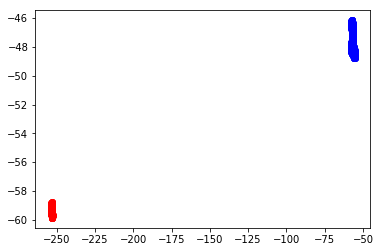

In [10]:
'eddyn_64', 'eddyn_66','eddyn_1015'
tt=-1
print(dictjoin['eddyn_1015']['time'][tt])
print(dictjoin['eddyn_66']['time'][tt])
plot(dictjoin['eddyn_1015']['contour'][tt][0],dictjoin['eddyn_1015']['contour'][tt][1],'or')
plot(dictjoin['eddyn_66']['contour'][tt][0],dictjoin['eddyn_66']['contour'][tt][1],'ob')
plot(dictjoin['eddyn_1015']['position'][tt][0],dictjoin['eddyn_1015']['position'][tt][1],'or')
plot(dictjoin['eddyn_66']['position'][tt][0],dictjoin['eddyn_66']['position'][tt][1],'ob')

[0]


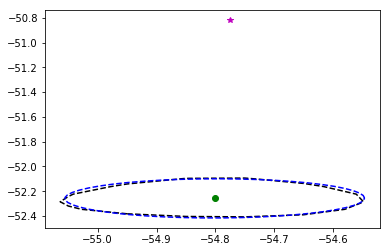

[1]


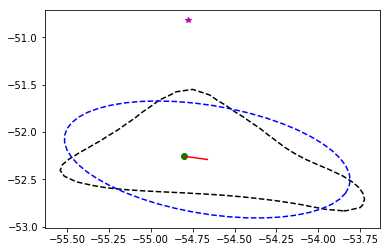

[2]


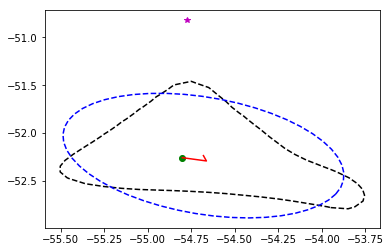

[3]


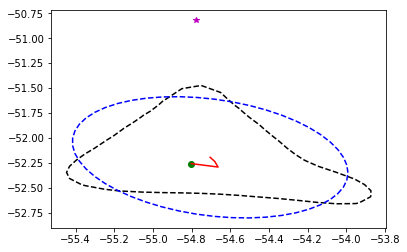

[4]


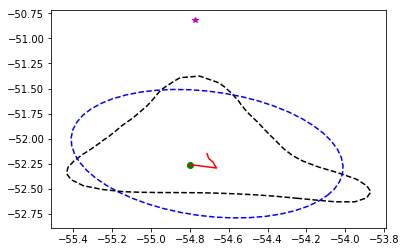

[5]


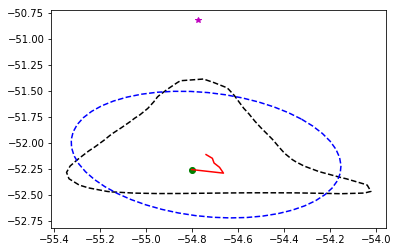

[6]


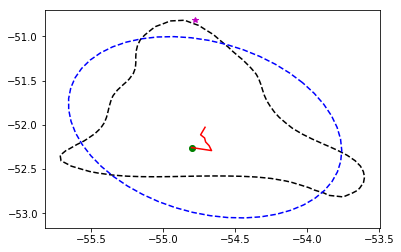

[7]


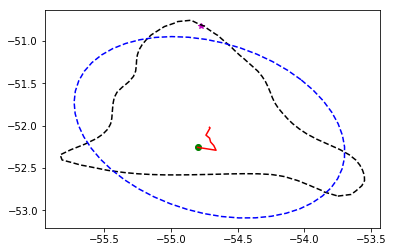

[8]


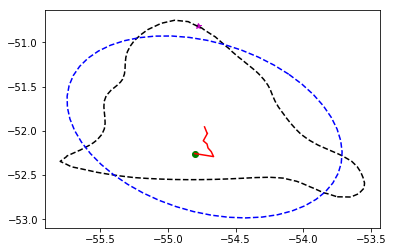

[9]


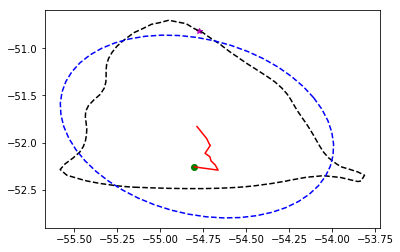

[10]


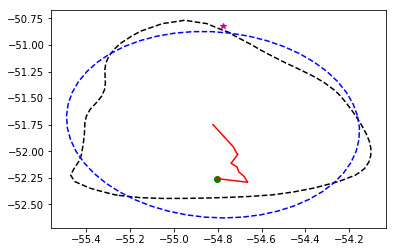

[11]


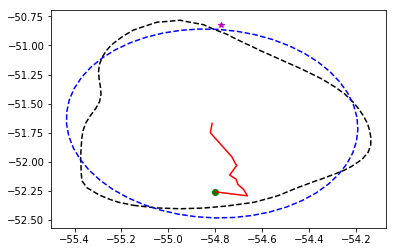

[12]


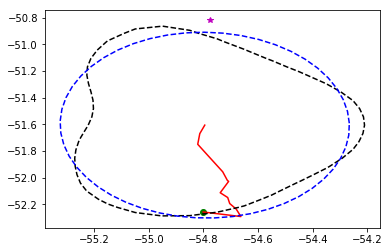

[13]


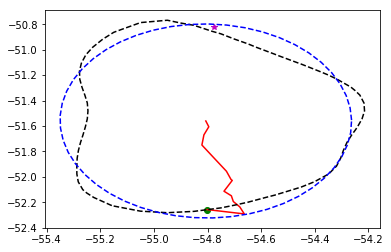

[14]


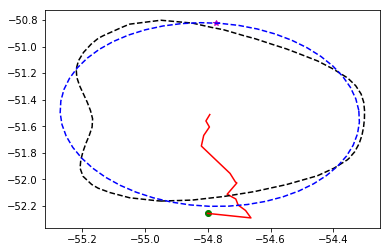

[15]


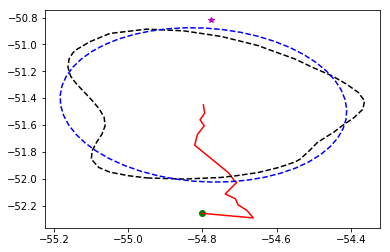

[16]


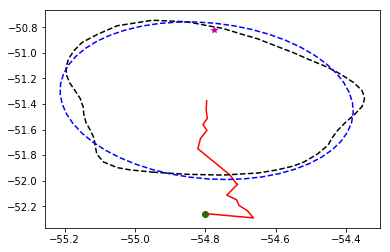

[17]


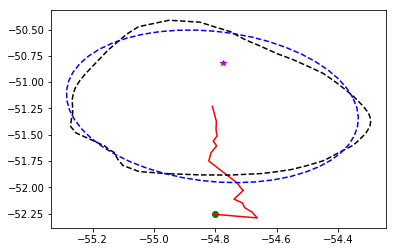

[18]


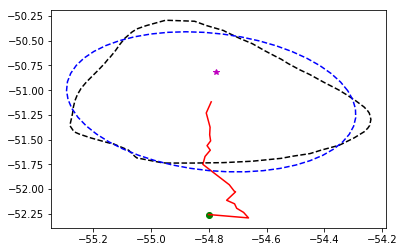

[19]


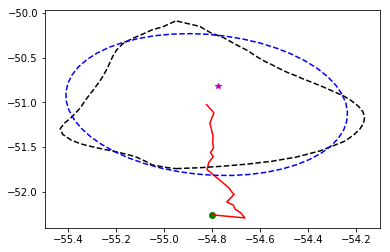

[21]


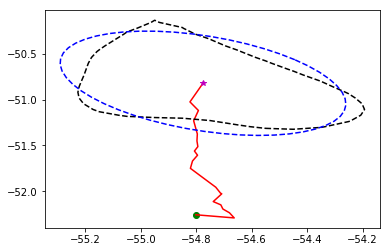

In [11]:
eddy=dict1['eddyn_59']

for ii in range(0,len(eddy['time'])):
    figure()
    print(eddy['time'][ii])
    plot(eddy['position_eddy'][0,0],eddy['position_eddy'][0,1],'og')
    plot(eddy['position_eddy'][0:ii+1,0],eddy['position_eddy'][0:ii+1,1],'r')
    plot(eddy['position_eddy'][-1,0],eddy['position_eddy'][-1,1],'*m')
    plot(eddy['contour'][ii][0],eddy['contour'][ii][1],'--k')
    plot(eddy['ellipse'][ii][0],eddy['ellipse'][ii][1],'--b')
    show()
    

[0]


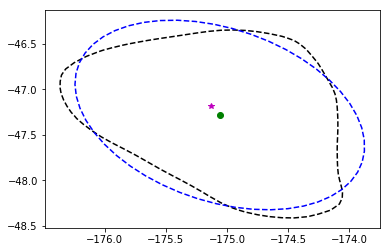

[1]


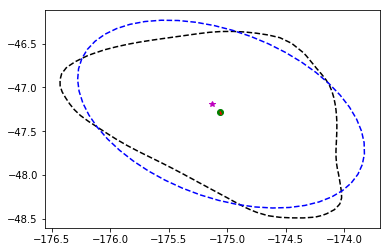

[2]


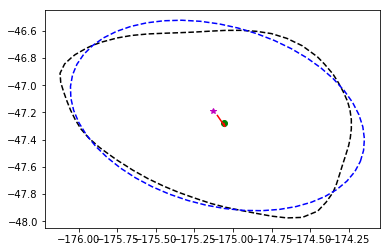

[3]


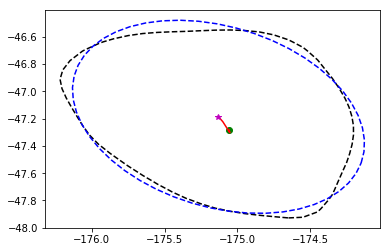

In [12]:
eddy=dict1['eddyn_64']

for ii in range(0,len(eddy['time'])):
    figure()
    print(eddy['time'][ii])
    plot(eddy['position_eddy'][0,0],eddy['position_eddy'][0,1],'og')
    plot(eddy['position_eddy'][0:ii+1,0],eddy['position_eddy'][0:ii+1,1],'r')
    plot(eddy['position_eddy'][-1,0],eddy['position_eddy'][-1,1],'*m')
    plot(eddy['contour'][ii][0],eddy['contour'][ii][1],'--k')
    plot(eddy['ellipse'][ii][0],eddy['ellipse'][ii][1],'--b')
    show()
    

In [13]:
def trackmatix(eddydict):
    eddy=0
    time=0
    for key,value in eddydict.items():
        if type(value['time'])!=int:
            if value['time'][-1]>time:
                time=value['time'][-1]+1

    positions=zeros([2,len(eddydict.items()),int(time)])
    for key,value in eddydict.items():
        if type(value['time'])==int:
            positions[0,eddy,value['time']]=value['position'][0]
            positions[1,eddy,value['time']]=value['position'][1]
        else:
            realinx=0
            for ii in value['time']:
                #print(ii)
                positions[0,eddy,ii]=squeeze(value['position'][realinx,0])
                positions[1,eddy,ii]=squeeze(value['position'][realinx,1])
                realinx=realinx+1
        eddy=eddy+1
    positions[positions==0]=np.nan
    return(positions)

In [14]:
positions=trackmatix(dict1)

In [15]:
for ii in range(shape(positions)[1]):
    sumjj=0
    for jj in range(shape(positions)[2]):
        if positions[0,ii,jj]!=0:
            sumjj=sumjj+1
    print(ii,sumjj)

0 362
1 362
2 362
3 362
4 362
5 362
6 362
7 362
8 362
9 362
10 362
11 362
12 362
13 362
14 362
15 362
16 362
17 362
18 362
19 362
20 362
21 362
22 362
23 362
24 362
25 362
26 362
27 362
28 362
29 362
30 362
31 362
32 362
33 362
34 362
35 362
36 362
37 362
38 362
39 362
40 362
41 362
42 362
43 362
44 362
45 362
46 362
47 362
48 362
49 362
50 362
51 362
52 362
53 362
54 362
55 362
56 362
57 362
58 362
59 362
60 362
61 362
62 362
63 362
64 362
65 362
66 362
67 362
68 362
69 362
70 362
71 362
72 362
73 362
74 362
75 362
76 362
77 362
78 362
79 362
80 362
81 362
82 362
83 362
84 362
85 362
86 362
87 362
88 362
89 362
90 362
91 362
92 362
93 362
94 362
95 362
96 362
97 362
98 362
99 362
100 362
101 362
102 362
103 362
104 362
105 362
106 362
107 362
108 362
109 362
110 362
111 362
112 362
113 362
114 362
115 362
116 362
117 362
118 362
119 362
120 362
121 362
122 362
123 362
124 362
125 362
126 362
127 362
128 362
129 362
130 362
131 362
132 362
133 362
134 362
135 362
136 362
137 362
138 36

1311 362
1312 362
1313 362
1314 362
1315 362
1316 362
1317 362
1318 362
1319 362
1320 362
1321 362
1322 362
1323 362
1324 362
1325 362
1326 362
1327 362
1328 362
1329 362
1330 362
1331 362
1332 362
1333 362
1334 362
1335 362
1336 362
1337 362
1338 362
1339 362
1340 362
1341 362
1342 362
1343 362
1344 362
1345 362
1346 362
1347 362
1348 362
1349 362
1350 362
1351 362
1352 362
1353 362
1354 362
1355 362
1356 362
1357 362
1358 362
1359 362
1360 362
1361 362
1362 362
1363 362
1364 362
1365 362
1366 362
1367 362
1368 362
1369 362
1370 362
1371 362
1372 362
1373 362
1374 362
1375 362
1376 362
1377 362
1378 362
1379 362
1380 362
1381 362
1382 362
1383 362
1384 362
1385 362
1386 362
1387 362
1388 362
1389 362
1390 362
1391 362
1392 362
1393 362
1394 362
1395 362
1396 362
1397 362
1398 362
1399 362
1400 362
1401 362
1402 362
1403 362
1404 362
1405 362
1406 362
1407 362
1408 362
1409 362
1410 362
1411 362
1412 362
1413 362
1414 362
1415 362
1416 362
1417 362
1418 362
1419 362
1420 362
1421 362
1

2573 362
2574 362
2575 362
2576 362
2577 362
2578 362
2579 362
2580 362
2581 362
2582 362
2583 362
2584 362
2585 362
2586 362
2587 362
2588 362
2589 362
2590 362
2591 362
2592 362
2593 362
2594 362
2595 362
2596 362
2597 362
2598 362
2599 362
2600 362
2601 362
2602 362
2603 362
2604 362
2605 362
2606 362
2607 362
2608 362
2609 362
2610 362
2611 362
2612 362
2613 362
2614 362
2615 362
2616 362
2617 362
2618 362
2619 362
2620 362
2621 362
2622 362
2623 362
2624 362
2625 362
2626 362
2627 362
2628 362
2629 362
2630 362
2631 362
2632 362
2633 362
2634 362
2635 362
2636 362
2637 362
2638 362
2639 362
2640 362
2641 362
2642 362
2643 362
2644 362
2645 362
2646 362
2647 362
2648 362
2649 362
2650 362
2651 362
2652 362
2653 362
2654 362
2655 362
2656 362
2657 362
2658 362
2659 362
2660 362
2661 362
2662 362
2663 362
2664 362
2665 362
2666 362
2667 362
2668 362
2669 362
2670 362
2671 362
2672 362
2673 362
2674 362
2675 362
2676 362
2677 362
2678 362
2679 362
2680 362
2681 362
2682 362
2683 362
2

3830 362
3831 362
3832 362
3833 362
3834 362
3835 362
3836 362
3837 362
3838 362
3839 362
3840 362
3841 362
3842 362
3843 362
3844 362
3845 362
3846 362
3847 362
3848 362
3849 362
3850 362
3851 362
3852 362
3853 362
3854 362
3855 362
3856 362
3857 362
3858 362
3859 362
3860 362
3861 362
3862 362
3863 362
3864 362
3865 362
3866 362
3867 362
3868 362
3869 362
3870 362
3871 362
3872 362
3873 362
3874 362
3875 362
3876 362
3877 362
3878 362
3879 362
3880 362
3881 362
3882 362
3883 362
3884 362
3885 362
3886 362
3887 362
3888 362
3889 362
3890 362
3891 362
3892 362
3893 362
3894 362
3895 362
3896 362
3897 362
3898 362
3899 362
3900 362
3901 362
3902 362
3903 362
3904 362
3905 362
3906 362
3907 362
3908 362
3909 362
3910 362
3911 362
3912 362
3913 362
3914 362
3915 362
3916 362
3917 362
3918 362
3919 362
3920 362
3921 362
3922 362
3923 362
3924 362
3925 362
3926 362
3927 362
3928 362
3929 362
3930 362
3931 362
3932 362
3933 362
3934 362
3935 362
3936 362
3937 362
3938 362
3939 362
3940 362
3

5105 362
5106 362
5107 362
5108 362
5109 362
5110 362
5111 362
5112 362
5113 362
5114 362
5115 362
5116 362
5117 362
5118 362
5119 362
5120 362
5121 362
5122 362
5123 362
5124 362
5125 362
5126 362
5127 362
5128 362
5129 362
5130 362
5131 362
5132 362
5133 362
5134 362
5135 362
5136 362
5137 362
5138 362
5139 362
5140 362
5141 362
5142 362
5143 362
5144 362
5145 362
5146 362
5147 362
5148 362
5149 362
5150 362
5151 362
5152 362
5153 362
5154 362
5155 362
5156 362
5157 362
5158 362
5159 362
5160 362
5161 362
5162 362
5163 362
5164 362
5165 362
5166 362
5167 362
5168 362
5169 362
5170 362
5171 362
5172 362
5173 362
5174 362
5175 362
5176 362
5177 362
5178 362
5179 362
5180 362
5181 362
5182 362
5183 362
5184 362
5185 362
5186 362
5187 362
5188 362
5189 362
5190 362
5191 362
5192 362
5193 362
5194 362
5195 362
5196 362
5197 362
5198 362
5199 362
5200 362
5201 362
5202 362
5203 362
5204 362
5205 362
5206 362
5207 362
5208 362
5209 362
5210 362
5211 362
5212 362
5213 362
5214 362
5215 362
5

6359 362
6360 362
6361 362
6362 362
6363 362
6364 362
6365 362
6366 362
6367 362
6368 362
6369 362
6370 362
6371 362
6372 362
6373 362
6374 362
6375 362
6376 362
6377 362
6378 362
6379 362
6380 362
6381 362
6382 362
6383 362
6384 362
6385 362
6386 362
6387 362
6388 362
6389 362
6390 362
6391 362
6392 362
6393 362
6394 362
6395 362
6396 362
6397 362
6398 362
6399 362
6400 362
6401 362
6402 362
6403 362
6404 362
6405 362
6406 362
6407 362
6408 362
6409 362
6410 362
6411 362
6412 362
6413 362
6414 362
6415 362
6416 362
6417 362
6418 362
6419 362
6420 362
6421 362
6422 362
6423 362
6424 362
6425 362
6426 362
6427 362
6428 362
6429 362
6430 362
6431 362
6432 362
6433 362
6434 362
6435 362
6436 362
6437 362
6438 362
6439 362
6440 362
6441 362
6442 362
6443 362
6444 362
6445 362
6446 362
6447 362
6448 362
6449 362
6450 362
6451 362
6452 362
6453 362
6454 362
6455 362
6456 362
6457 362
6458 362
6459 362
6460 362
6461 362
6462 362
6463 362
6464 362
6465 362
6466 362
6467 362
6468 362
6469 362
6

7605 362
7606 362
7607 362
7608 362
7609 362
7610 362
7611 362
7612 362
7613 362
7614 362
7615 362
7616 362
7617 362
7618 362
7619 362
7620 362
7621 362
7622 362
7623 362
7624 362
7625 362
7626 362
7627 362
7628 362
7629 362
7630 362
7631 362
7632 362
7633 362
7634 362
7635 362
7636 362
7637 362
7638 362
7639 362
7640 362
7641 362
7642 362
7643 362
7644 362
7645 362
7646 362
7647 362
7648 362
7649 362
7650 362
7651 362
7652 362
7653 362
7654 362
7655 362
7656 362
7657 362
7658 362
7659 362
7660 362
7661 362
7662 362
7663 362
7664 362
7665 362
7666 362
7667 362
7668 362
7669 362
7670 362
7671 362
7672 362
7673 362
7674 362
7675 362
7676 362
7677 362
7678 362
7679 362
7680 362
7681 362
7682 362
7683 362
7684 362
7685 362
7686 362
7687 362
7688 362
7689 362
7690 362
7691 362
7692 362
7693 362
7694 362
7695 362
7696 362
7697 362
7698 362
7699 362
7700 362
7701 362
7702 362
7703 362
7704 362
7705 362
7706 362
7707 362
7708 362
7709 362
7710 362
7711 362
7712 362
7713 362
7714 362
7715 362
7

8811 362
8812 362
8813 362
8814 362
8815 362
8816 362
8817 362
8818 362
8819 362
8820 362
8821 362
8822 362
8823 362
8824 362
8825 362
8826 362
8827 362
8828 362
8829 362
8830 362
8831 362
8832 362
8833 362
8834 362
8835 362
8836 362
8837 362
8838 362
8839 362
8840 362
8841 362
8842 362
8843 362
8844 362
8845 362
8846 362
8847 362
8848 362
8849 362
8850 362
8851 362
8852 362
8853 362
8854 362
8855 362
8856 362
8857 362
8858 362
8859 362
8860 362
8861 362
8862 362
8863 362
8864 362
8865 362
8866 362
8867 362
8868 362
8869 362
8870 362
8871 362
8872 362
8873 362
8874 362
8875 362
8876 362
8877 362
8878 362
8879 362
8880 362
8881 362
8882 362
8883 362
8884 362
8885 362
8886 362
8887 362
8888 362
8889 362
8890 362
8891 362
8892 362
8893 362
8894 362
8895 362
8896 362
8897 362
8898 362
8899 362
8900 362
8901 362
8902 362
8903 362
8904 362
8905 362
8906 362
8907 362
8908 362
8909 362
8910 362
8911 362
8912 362
8913 362
8914 362
8915 362
8916 362
8917 362
8918 362
8919 362
8920 362
8921 362
8

10067 362
10068 362
10069 362
10070 362
10071 362
10072 362
10073 362
10074 362
10075 362
10076 362
10077 362
10078 362
10079 362
10080 362
10081 362
10082 362
10083 362
10084 362
10085 362
10086 362
10087 362
10088 362
10089 362
10090 362
10091 362
10092 362
10093 362
10094 362
10095 362
10096 362
10097 362
10098 362
10099 362
10100 362
10101 362
10102 362
10103 362
10104 362
10105 362
10106 362
10107 362
10108 362
10109 362
10110 362
10111 362
10112 362
10113 362
10114 362
10115 362
10116 362
10117 362
10118 362
10119 362
10120 362
10121 362
10122 362
10123 362
10124 362
10125 362
10126 362
10127 362
10128 362
10129 362
10130 362
10131 362
10132 362
10133 362
10134 362
10135 362
10136 362
10137 362
10138 362
10139 362
10140 362
10141 362
10142 362
10143 362
10144 362
10145 362
10146 362
10147 362
10148 362
10149 362
10150 362
10151 362
10152 362
10153 362
10154 362
10155 362
10156 362
10157 362
10158 362
10159 362
10160 362
10161 362
10162 362
10163 362
10164 362
10165 362
10166 362


11325 362
11326 362
11327 362
11328 362
11329 362
11330 362
11331 362
11332 362
11333 362
11334 362
11335 362
11336 362
11337 362
11338 362
11339 362
11340 362
11341 362
11342 362
11343 362
11344 362
11345 362
11346 362
11347 362
11348 362
11349 362
11350 362
11351 362
11352 362
11353 362
11354 362
11355 362
11356 362
11357 362
11358 362
11359 362
11360 362
11361 362
11362 362
11363 362
11364 362
11365 362
11366 362
11367 362
11368 362
11369 362
11370 362
11371 362
11372 362
11373 362
11374 362
11375 362
11376 362
11377 362
11378 362
11379 362
11380 362
11381 362
11382 362
11383 362
11384 362
11385 362
11386 362
11387 362
11388 362
11389 362
11390 362
11391 362
11392 362
11393 362
11394 362
11395 362
11396 362
11397 362
11398 362
11399 362
11400 362
11401 362
11402 362
11403 362
11404 362
11405 362
11406 362
11407 362
11408 362
11409 362
11410 362
11411 362
11412 362
11413 362
11414 362
11415 362
11416 362
11417 362
11418 362
11419 362
11420 362
11421 362
11422 362
11423 362
11424 362


12547 362
12548 362
12549 362
12550 362
12551 362
12552 362
12553 362
12554 362
12555 362
12556 362
12557 362
12558 362
12559 362
12560 362
12561 362
12562 362
12563 362
12564 362
12565 362
12566 362
12567 362
12568 362
12569 362
12570 362
12571 362
12572 362
12573 362
12574 362
12575 362
12576 362
12577 362
12578 362
12579 362
12580 362
12581 362
12582 362
12583 362
12584 362
12585 362
12586 362
12587 362
12588 362
12589 362
12590 362
12591 362
12592 362
12593 362
12594 362
12595 362
12596 362
12597 362
12598 362
12599 362
12600 362
12601 362
12602 362
12603 362
12604 362
12605 362
12606 362
12607 362
12608 362
12609 362
12610 362
12611 362
12612 362
12613 362
12614 362
12615 362
12616 362
12617 362
12618 362
12619 362
12620 362
12621 362
12622 362
12623 362
12624 362
12625 362
12626 362
12627 362
12628 362
12629 362
12630 362
12631 362
12632 362
12633 362
12634 362
12635 362
12636 362
12637 362
12638 362
12639 362
12640 362
12641 362
12642 362
12643 362
12644 362
12645 362
12646 362


13793 362
13794 362
13795 362
13796 362
13797 362
13798 362
13799 362
13800 362
13801 362
13802 362
13803 362
13804 362
13805 362
13806 362
13807 362
13808 362
13809 362
13810 362
13811 362
13812 362
13813 362
13814 362
13815 362
13816 362
13817 362
13818 362
13819 362
13820 362
13821 362
13822 362
13823 362
13824 362
13825 362
13826 362
13827 362
13828 362
13829 362
13830 362
13831 362
13832 362
13833 362
13834 362
13835 362
13836 362
13837 362
13838 362
13839 362
13840 362
13841 362
13842 362
13843 362
13844 362
13845 362
13846 362
13847 362
13848 362
13849 362
13850 362
13851 362
13852 362
13853 362
13854 362
13855 362
13856 362
13857 362
13858 362
13859 362
13860 362
13861 362
13862 362
13863 362
13864 362
13865 362
13866 362
13867 362
13868 362
13869 362
13870 362
13871 362
13872 362
13873 362
13874 362
13875 362
13876 362
13877 362
13878 362
13879 362
13880 362
13881 362
13882 362
13883 362
13884 362
13885 362
13886 362
13887 362
13888 362
13889 362
13890 362
13891 362
13892 362


In [16]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [17]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output307/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta1=ncfile.variables['eta_t'][:]*100


In [18]:
ssha=vstack((eta,eta1))
print(shape(ssha))

(181, 931, 3600)


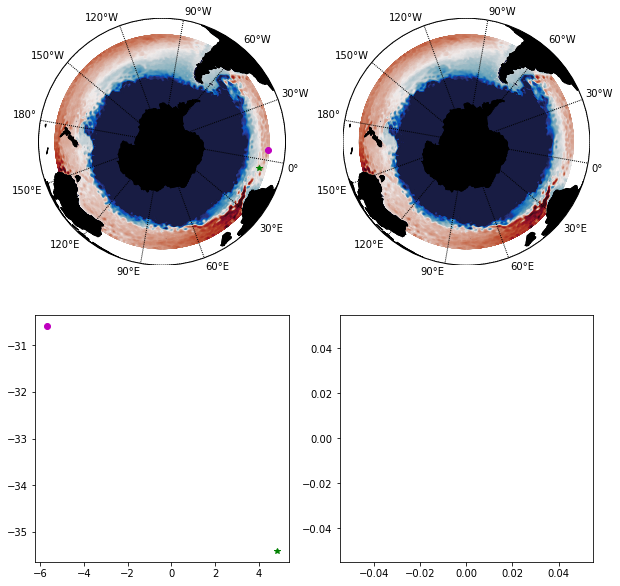

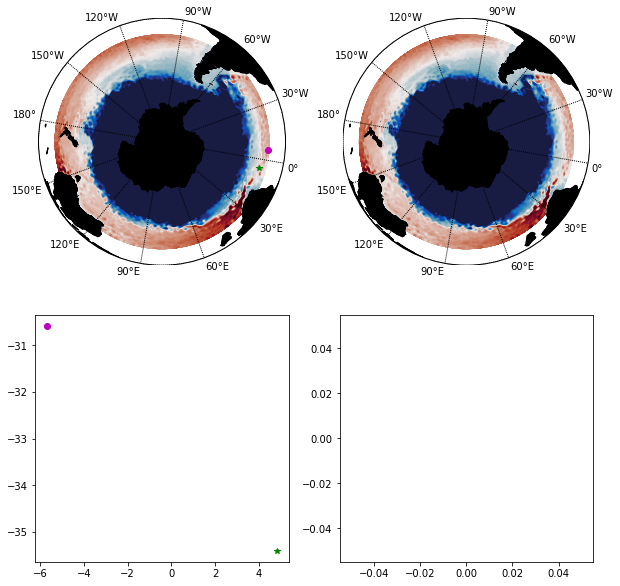

KeyboardInterrupt: 

In [20]:

eddy1=0
eddy2=42
eddy3=4448



for iiter in range(0,180):
    fig = plt.figure(figsize=(10, 10),facecolor='white')
    gs = gridspec.GridSpec(2, 2)

    ax1 = plt.subplot(gs[0,0])

    lonmm,latmm=np.meshgrid(lon,lat)

    map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax1)
    lonm,latm=map(lonmm,latmm)
    map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
    map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
    map.fillcontinents(color='black',lake_color='aqua')
    map.drawcoastlines()
    map.drawcoastlines()

    ax2 = plt.subplot(gs[0,1])

    map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax2)
    lonm,latm=map(lonmm,latmm)
    map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
    map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
    map.fillcontinents(color='black',lake_color='aqua')
    map.drawcoastlines()
    map.drawcoastlines()
    
    xx2,yy2=map(positions[0,eddy2,:],positions[1,eddy2,:])
    xx2[xx2==1.00000000e+30]==np.nan
    yy2[yy2==1.00000000e+30]==np.nan

    xx3,yy3=map(positions[0,eddy3,:],positions[1,eddy3,:])
    xx3[xx3==1.00000000e+30]==np.nan
    yy3[yy3==1.00000000e+30]==np.nan
    
    quad1 = ax1.pcolormesh(lonm,latm,ssha[iiter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-80,vmax=80)
    ax1.plot(xx2[0],yy2[0],'*g')
    ax1.plot(xx2[-1],yy2[-1],'om')
    
    quad2 = ax2.pcolormesh(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-80,vmax=80)
    ax2.plot(xx3[0],yy3[0],'*g')
    ax2.plot(xx3[-1],yy3[-1],'om')

    ax3 = plt.subplot(gs[1,0])
    ax3.plot(positions[0,eddy2,0],positions[1,eddy2,0],'*g')
    ax3.plot(positions[0,eddy2,-1],positions[1,eddy2,-1],'om')
    ax3.plot(positions[0,eddy2,0:iiter],positions[1,eddy2,0:iiter],'-k')

    ax4 = plt.subplot(gs[1,1])
    ax4.plot(positions[0,eddy3,0],positions[1,eddy3,0],'*g')
    ax4.plot(positions[0,eddy3,-1],positions[1,eddy3,-1],'om')
    ax4.plot(positions[0,eddy3,0:iiter],positions[1,eddy3,0:iiter],'-k')
    
    plt.show()
    plt.close()

In [ ]:
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim2

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim2.save('../output/track180days_2eddys.mp4', writer=writer)

In [ ]:
positions[0,eddy3,:]